<a href="https://colab.research.google.com/github/MasterMind-hack/AI-Portfolio-Santosh-Adhikari/blob/main/Week3_Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
csvfile="diabetesN.csv"
#please note your csvfilePAth would be the path where you uploaded and saved the diabetesN.csv
csvfilePath='/content/diabetesN (2).csv'
pima = pd.read_csv(csvfilePath)
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
pima['Glucose'].value_counts()

,count
Glucose,
99,17
100,17
111,14
125,14
129,14
...,...
56,1
169,1
149,1


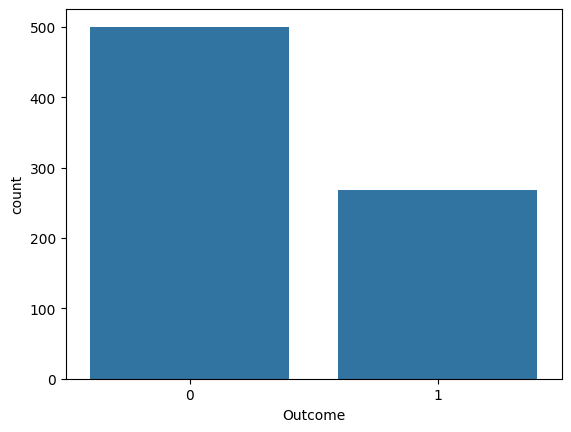

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# count plot on single categorical variable
sns.countplot(x ='Outcome', data =pima )

# Show the plot
plt.show()

In [7]:
count_no_sub = len(pima[pima['Outcome']==0])
count_sub = len(pima[pima['Outcome']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no Diabetics is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of Diabetics", pct_of_sub*100)

percentage of no Diabetics is 65.10416666666666
percentage of Diabetics 34.89583333333333


In [8]:
pima.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [9]:
#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction']
X = pima[feature_cols] # Featur


y = pima.Outcome # Target variable
X
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [10]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [11]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#let see how many  0 and 1 are in outcome for test dataset

In [12]:
print(y_test.value_counts())

Outcome
0    125
1     67
Name: count, dtype: int64


In [13]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[115,  10],
       [ 25,  42]])

Text(0.5, 427.9555555555555, 'Predicted label')

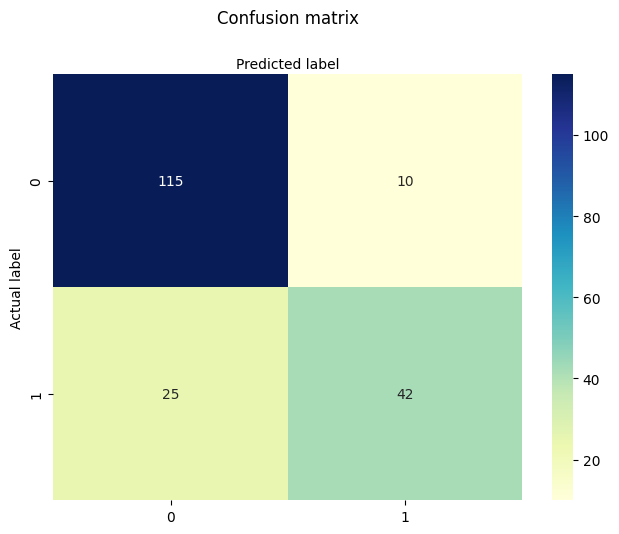

In [14]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [15]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.8076923076923077
0.6268656716417911


In [16]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.82      0.92      0.87       125
   with diabetes       0.81      0.63      0.71        67

        accuracy                           0.82       192
       macro avg       0.81      0.77      0.79       192
    weighted avg       0.82      0.82      0.81       192



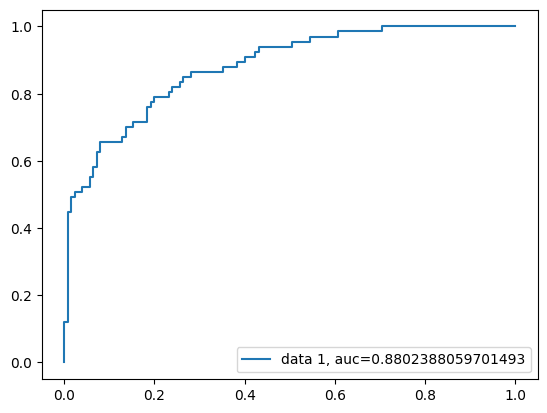

In [17]:
#Roc
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

**using SMOTE**

In [18]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X,y)

In [19]:
y_resampled.value_counts()

,count
Outcome,
1,500
0,500


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=16)

In [21]:
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[97, 32],
       [39, 82]])

Text(0.5, 427.9555555555555, 'Predicted label')

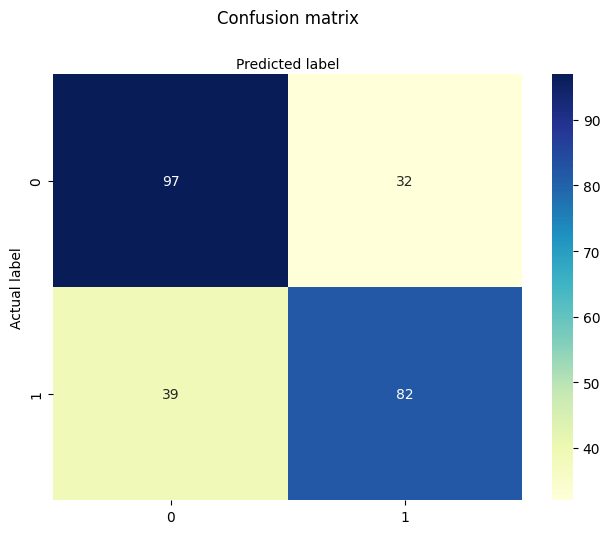

In [22]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [23]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.7192982456140351
0.6776859504132231


In [24]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))


                  precision    recall  f1-score   support

without diabetes       0.71      0.75      0.73       129
   with diabetes       0.72      0.68      0.70       121

        accuracy                           0.72       250
       macro avg       0.72      0.71      0.71       250
    weighted avg       0.72      0.72      0.72       250



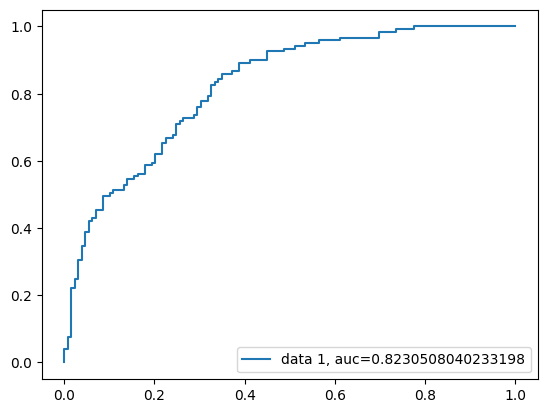

In [25]:
#Roc
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()